In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
from pylab import rcParams

In [ ]:
sns.set(rc={'figure.figsize':(14,7)})

In [ ]:
# lets read the dataset
data_kseb = pd.read_csv("D:/mTECH/final project/datasets/kasargod data _01042019_2023_recent.csv")

In [ ]:
data_kseb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35088 entries, 0 to 35087
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                35088 non-null  int64  
 1   MO                  35088 non-null  int64  
 2   DY                  35088 non-null  int64  
 3   HR                  35088 non-null  int64  
 4   ALLSKY_SFC_PAR_TOT  35088 non-null  float64
 5   T2M                 35088 non-null  float64
 6   QV2M                35088 non-null  float64
 7   PS                  35088 non-null  float64
 8   CLRSKY_SFC_SW_DWN   35088 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.4 MB


In [ ]:
data_kseb.shape

(35088, 9)

In [ ]:
data_kseb.head()

,YEAR,MO,DY,HR,ALLSKY_SFC_PAR_TOT,T2M,QV2M,PS,CLRSKY_SFC_SW_DWN
0,2019,3,31,5,0.00,26.55,17.82,100.01,0.00
1,2019,3,31,6,26.12,26.66,18.01,100.08,61.92
2,2019,3,31,7,117.58,27.38,17.88,100.15,276.67
3,2019,3,31,8,230.23,28.70,16.72,100.20,522.17
4,2019,3,31,9,318.30,30.75,15.50,100.21,737.55


In [ ]:
data_kseb.tail()

,YEAR,MO,DY,HR,ALLSKY_SFC_PAR_TOT,T2M,QV2M,PS,CLRSKY_SFC_SW_DWN
35083,2023,4,1,0,-999.0,26.44,17.03,99.76,-999.0
35084,2023,4,1,1,-999.0,26.20,17.03,99.70,-999.0
35085,2023,4,1,2,-999.0,26.05,17.09,99.69,-999.0
35086,2023,4,1,3,-999.0,25.87,17.09,99.71,-999.0
35087,2023,4,1,4,-999.0,25.81,17.09,99.77,-999.0


In [ ]:
data_kseb.shape

(35088, 9)

In [ ]:
data_kseb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35088 entries, 0 to 35087
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                35088 non-null  int64  
 1   MO                  35088 non-null  int64  
 2   DY                  35088 non-null  int64  
 3   HR                  35088 non-null  int64  
 4   ALLSKY_SFC_PAR_TOT  35088 non-null  float64
 5   T2M                 35088 non-null  float64
 6   QV2M                35088 non-null  float64
 7   PS                  35088 non-null  float64
 8   CLRSKY_SFC_SW_DWN   35088 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.4 MB


In [ ]:
data_kseb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35088 entries, 0 to 35087
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                35088 non-null  int64  
 1   MO                  35088 non-null  int64  
 2   DY                  35088 non-null  int64  
 3   HR                  35088 non-null  int64  
 4   ALLSKY_SFC_PAR_TOT  35088 non-null  float64
 5   T2M                 35088 non-null  float64
 6   QV2M                35088 non-null  float64
 7   PS                  35088 non-null  float64
 8   CLRSKY_SFC_SW_DWN   35088 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.4 MB


<AxesSubplot:>

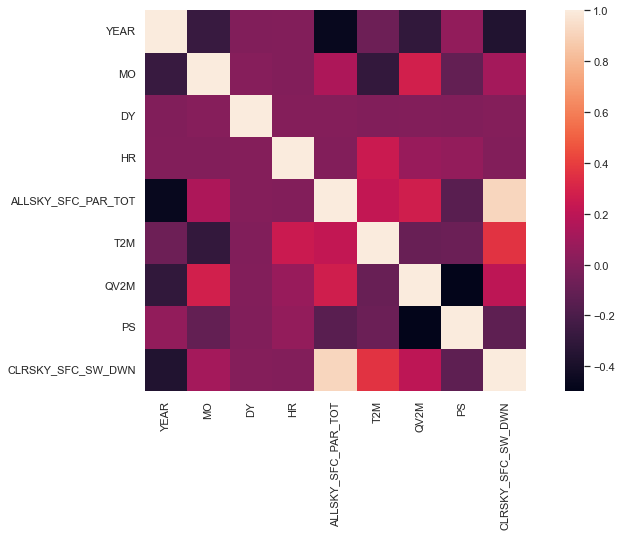

In [ ]:
correlation=data_kseb.corr()
sns.heatmap(correlation,vmax=1,square=True)

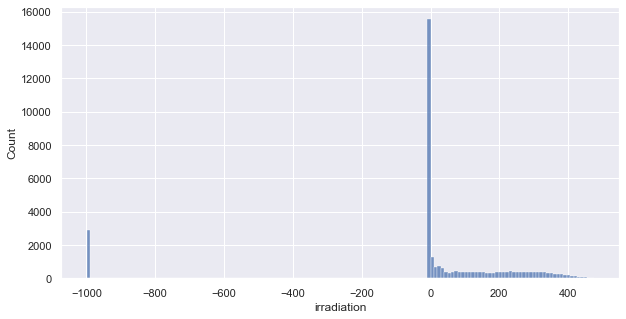

In [ ]:
# Plot histogram of target variable
plt.figure(figsize=(10,5))
sns.histplot(data_kseb.ALLSKY_SFC_PAR_TOT);
plt.xlabel('irradiation');

In [ ]:
#Correlation analysis
data_kseb_corr =data_kseb[['YEAR', 'MO', 'DY', 'HR', 'ALLSKY_SFC_PAR_TOT',
              'T2M', 'QV2M', 'PS', 'CLRSKY_SFC_SW_DWN']].corr()

In [ ]:
mask = np.triu(np.ones_like(data_kseb_corr, dtype=bool))

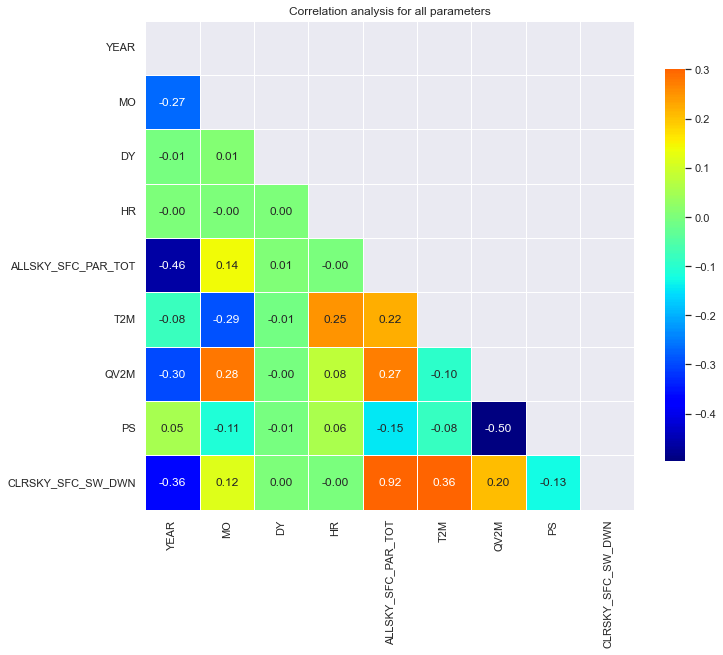

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data_kseb_corr, mask=mask, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis for all parameters');

In [ ]:
#observations:ALLSKY_SFC_PAR_TOT  and CLRSKY_SFC_SW_DWN are closely correlTED
#PRESSURE AND HUMIDITY shall be inversly propotional
#year and radiations are somewhat correlated.


In [ ]:
#Data Preprocessing
#Check for missing values

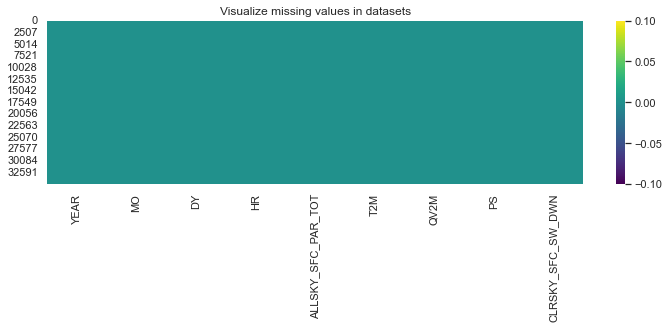

In [ ]:
plt.figure(figsize=(12, 3))
sns.heatmap(data_kseb.isnull(), cmap='viridis');
plt.title('Visualize missing values in datasets');

In [ ]:
#MANAGING MISSING VALUES
data_kseb.reset_index(drop=True, inplace=True)


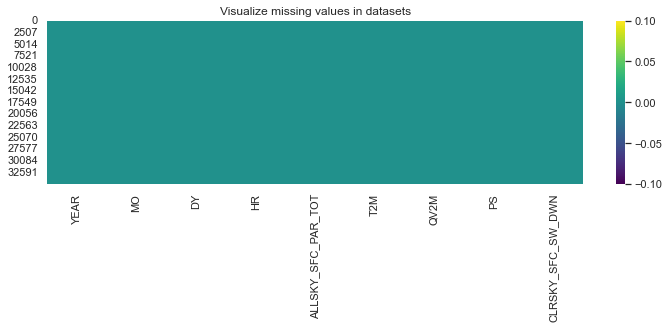

In [ ]:
plt.figure(figsize=(12, 3))
sns.heatmap(data_kseb.isnull(), cmap='viridis');
plt.title('Visualize missing values in datasets');

In [ ]:
#look for the indices of all rows with 2 or more -999
missing_data_indices = np.where((data_kseb<=-999).apply(sum, axis=1)>=2)[0]
# drop such indices
data_kseb.drop(missing_data_indices, axis=0, inplace=True)
# Checking that the rows are dropped
data_kseb.shape

(32184, 9)

In [ ]:
col_names = data_kseb.columns
from collections import defaultdict
stats = defaultdict(int)
total_single_missing_values = 0
for name in col_names:
    col_mean = data_kseb[~(data_kseb[name] == -999)][name].mean()
    missing_indices = np.where((data_kseb[name] == -999))
    stats[name] = len(missing_indices[0])
    data_kseb[name].loc[missing_indices] = col_mean
    total_single_missing_values += sum(data_kseb[name] == -999)

C:\Users\renji\AppData\Local\Temp\ipykernel_552\1059181358.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kseb[name].loc[missing_indices] = col_mean
C:\Users\renji\AppData\Local\Temp\ipykernel_552\1059181358.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kseb[name].loc[missing_indices] = col_mean
C:\Users\renji\AppData\Local\Temp\ipykernel_552\1059181358.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kseb[

In [ ]:
df_col_min = data_kseb.apply(min, axis=0)
df_col_max = data_kseb.apply(max, axis =0)

In [ ]:
df_col_min
df_col_max


YEAR                  2022.00
MO                      12.00
DY                      31.00
HR                      23.00
ALLSKY_SFC_PAR_TOT     474.92
T2M                     36.03
QV2M                    22.03
PS                     100.57
CLRSKY_SFC_SW_DWN     1049.42
dtype: float64

In [ ]:
data_kseb_zero= np.where((data_kseb <=-999).apply(sum, axis=1)==1)[0]

In [ ]:
len(data_kseb_zero)

0

In [ ]:
len(data_kseb)


32184

In [ ]:
#Exploratory Data Analysis
allsky_sfc_everyday = data_kseb.groupby(['DY'])['ALLSKY_SFC_PAR_TOT'].mean()
temp_everyday = data_kseb.groupby(['DY'])['T2M'].mean()
j_day = data_kseb['DY'].unique()












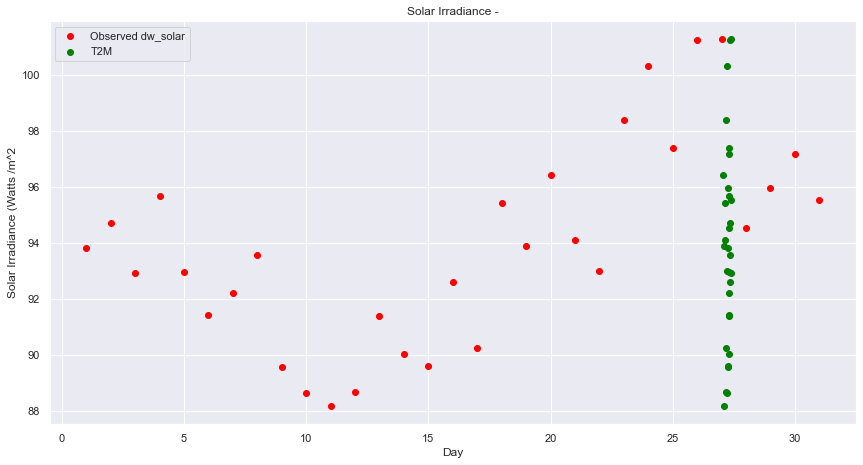

In [ ]:
fig = plt.figure()

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])


axes1.scatter(j_day,allsky_sfc_everyday,label='Observed dw_solar',color='red')
axes1.scatter(temp_everyday, allsky_sfc_everyday, label='T2M',color='green')
axes1.set_xlabel('Day')
axes1.set_ylabel('Solar Irradiance (Watts /m^2')
axes1.set_title('Solar Irradiance -')
axes1.legend(loc='best')

fig.savefig('Figure2.png', bbox_inches = 'tight')


In [ ]:
fig1 = plt.figure()

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
#axes2 = fig.add_axes([0.1,0.1,0.8,0.8])

axes1.scatter(j_day,dw_solar_everyday,label='Observed dw_solar',color='red')
axes1.scatter(j_day, ghi_everyday, label='Clear Sky GHI',color='green')

axes1.set_xlabel('Days')
axes1.set_ylabel('Solar Irradiance (Watts /m^2)')
axes1.set_title('Solar Irradiance - Test Year 2009')
axes1.legend(loc='best')

fig.savefig('Figure2.png', bbox_inches = 'tight')